<a href="https://colab.research.google.com/github/ShraddhaSharma24/Reinforcement-Learning/blob/main/Reinforcement_Learning_for_Robot_Path_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinforcement Learning for Robot Path Planning

Overview

This project implements a Reinforcement Learning (RL)-based path planning system using a grid-based environment. The goal is to train an agent to navigate from a start position to a goal position, while avoiding obstacles. The agent receives rewards for reaching the goal and penalties for collisions.

Implementation Details

Custom GridWorld Environment: A 10x10 grid world where the agent moves up, down, left, or right.

Reinforcement Learning Framework: Uses Deep Q-Networks (DQN) from Stable-Baselines3 to train the agent.

Reward System:

+100 for reaching the goal.

-1 step penalty to encourage efficiency.

-10 for colliding with obstacles.

Visualization: The environment is rendered using Matplotlib, allowing real-time updates of the agent's movement.

Advantages & Future Applications

Advantages

Path Optimization: The RL agent learns the most efficient path.

Obstacle Avoidance: The model trains itself to navigate complex environments.

Scalability: The approach can be expanded to dynamic and real-world robotics applications.

Future Applications

Autonomous Vehicles: Enhancing self-driving car navigation in unstructured environments.

Robotics: Used in warehouse automation, drone navigation, and rescue operations.

Smart Cities: Applied in intelligent traffic routing and automated delivery systems.



Train the RL Model:
Modify the script to train with Deep Q-Learning (DQN).

Future Improvements

Implement dynamic obstacles for real-time adaptability.

Use Continuous Action Spaces for more flexible movement.

Extend the grid world to 3D environments for drone or robotic arm navigation.

In [3]:
pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import DQN
from IPython.display import clear_output
import time

In [14]:
# Custom Grid Environment
class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=10):
        super(GridWorldEnv, self).__init__()
        self.grid_size = grid_size
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)
        self.action_space = spaces.Discrete(4)  # Up, Down, Left, Right

        # Define obstacles
        self.obstacles = [(3, 3), (4, 4), (5, 5), (6, 6)]

        # Define start and goal positions
        self.start_pos = (0, 0)
        self.goal_pos = (9, 9)
        self.state = self.start_pos

    def reset(self):
        self.state = self.start_pos
        return np.array(self.state, dtype=np.int32)

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = min(y + 1, self.grid_size - 1)
        elif action == 1:  # Down
            y = max(y - 1, 0)
        elif action == 2:  # Left
            x = max(x - 1, 0)
        elif action == 3:  # Right
            x = min(x + 1, self.grid_size - 1)

        new_state = (x, y)
        reward = -1  # Default step penalty
        done = False

        if new_state in self.obstacles:
            reward = -10  # Penalty for hitting an obstacle
            new_state = self.state  # Stay in place
        elif new_state == self.goal_pos:
            reward = 100  # Goal reward
            done = True

        self.state = new_state
        return np.array(self.state, dtype=np.int32), reward, done, {}

    def render(self, mode='human'):
        clear_output(wait=True)
        grid = np.zeros((self.grid_size, self.grid_size))
        for (ox, oy) in self.obstacles:
            grid[oy, ox] = -1  # Obstacles
        grid[self.goal_pos[1], self.goal_pos[0]] = 2  # Goal
        grid[self.state[1], self.state[0]] = 1  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid, cmap='coolwarm', origin='upper')
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid(True)
        plt.show()
        time.sleep(0.3)  # Pause to simulate movement

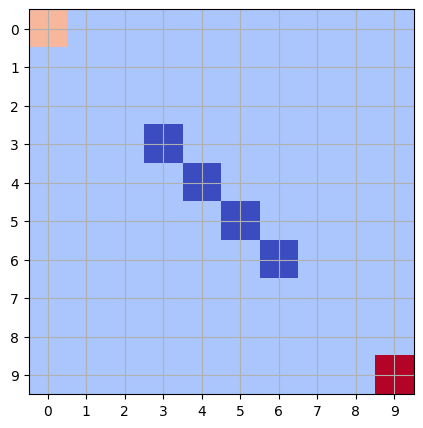

In [15]:

# Create environment
env = GridWorldEnv()

env.reset()
env.render()